Code for modelling phase-field fracture in ice-shelf melt channels
The code requires FEniCSx---see the README for details.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../nonlinear-model')

In [2]:
from main import solve
from smb import smb_h, smb_s
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from params import H, L, t
import os

In [3]:
m0 = 1.024 / 3.154e7     # max basal melt(+) or freeze(-) rate (m/yr)
stdev = 5*H/3            # standard deviation of Gaussian-shaped basal melt anomaly

# define surface accumulation and basal melt rates
# (*these are balanced by default in an integrated sense
#  so that steady states are possible)
a = lambda x,t: smb_h(x,t,m0,stdev)
m = lambda x,t: smb_s(x,t,m0,stdev)

# solve the problem
geometry, phase_field = solve(a,m)

Plot the solution:

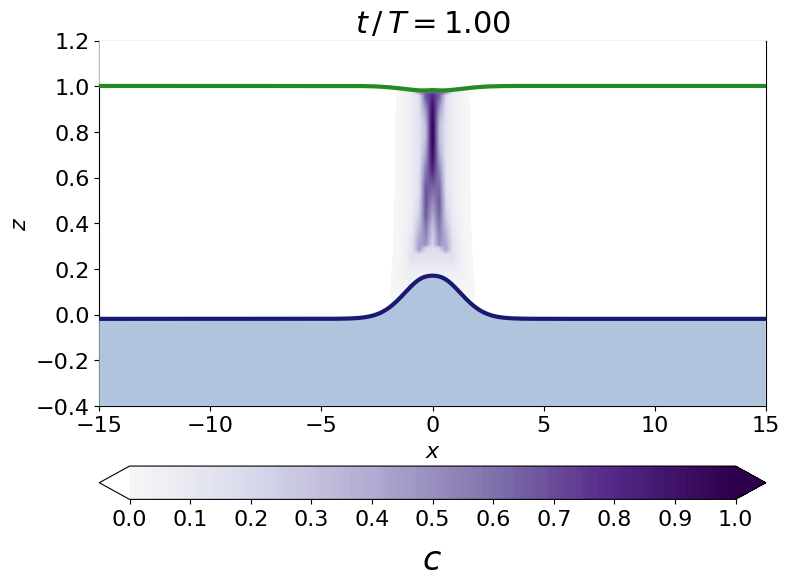

In [4]:
h = geometry.h
s = geometry.s
x = geometry.x

C = phase_field.C-1e-2 # cosmetic subtraction 
X = phase_field.X
Z = phase_field.Z

cmap = plt.cm.PuOr
cmap.set_under('w')

%matplotlib inline
i = -1
plt.close()
plt.figure(figsize=(8,6))
plt.title(r'$t\,/\, T=$'+'{:.2f}'.format(t[i]/t.max()),fontsize=22)
plt.plot(x/H,1+(h[:,i]-H)/H,linewidth=3,color='forestgreen',zorder=31)
plt.plot(x/H,s[:,i]/H,linewidth=3,color='midnightblue',zorder=32)
plt.fill_between(x/H,y1=s[:,i]/H, y2=1+(h[:,i]-H)/H,facecolor='ghostwhite',alpha=1.0)
plt.contourf(X[:,:,i],Z[:,:,i],C[:,:,i],cmap=cmap,levels=np.linspace(0,1,111),vmin=-1,vmax=1,extend='both')
plt.fill_between(x/H,y1=-2*np.ones(np.size(x)), y2=s[:,i]/H,facecolor='lightsteelblue',alpha=1,zorder=15)
plt.fill_between(x/H,y1=1+(h[:,i]-H)/H,y2=2*np.ones(x.size),facecolor='w',alpha=1.0,zorder=16)
plt.ylabel(r'$z$',fontsize=16)
plt.xlabel(r'$x$',fontsize=16)
cbar = plt.colorbar(orientation='horizontal',pad=0.12,ticks=np.linspace(0,1,11))
cbar.ax.tick_params(labelsize=16)
cbar.set_label(r'$c$ ',fontsize=24,labelpad=10)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(-0.4,1.2)
plt.xlim(-0.5*L/H,0.5*L/H)
plt.tight_layout()
plt.show()
plt.close()

Make a movie:

In [5]:
if os.path.isdir('./movie')==False:
    os.mkdir('./movie')
    
mpl.use('Agg')    

for i in range(t.size):
    plt.close()
    fig = plt.figure(figsize=(8,6))
    plt.title(r'$t\,/\, T=$'+'{:.2f}'.format(t[i]/t.max()),fontsize=22)
    plt.plot(x/H,1+(h[:,i]-H)/H,linewidth=3,color='forestgreen',zorder=31)
    plt.plot(x/H,s[:,i]/H,linewidth=3,color='midnightblue',zorder=32)
    plt.fill_between(x/H,y1=s[:,i]/H, y2=1+(h[:,i]-H)/H,facecolor='ghostwhite',alpha=1.0)
    plt.contourf(X[:,:,i],Z[:,:,i],C[:,:,i],cmap=cmap,levels=np.linspace(0,1,111),vmin=-1,vmax=1,extend='both')
    plt.fill_between(x/H,y1=-2*np.ones(np.size(x)), y2=s[:,i]/H,facecolor='lightsteelblue',alpha=1,zorder=15)
    plt.fill_between(x/H,y1=1+(h[:,i]-H)/H,y2=2*np.ones(x.size),facecolor='w',alpha=1.0,zorder=16)
    plt.ylabel(r'$z$',fontsize=16)
    plt.xlabel(r'$x$',fontsize=16)
    cbar = plt.colorbar(orientation='horizontal',pad=0.12,ticks=np.linspace(0,1,11))
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(r'$c$ ',fontsize=24,labelpad=10)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.ylim(-0.4,1.2)
    plt.xlim(-0.5*L/H,0.5*L/H)
    plt.tight_layout()
    plt.savefig('movie/'+str(i))
    plt.close()